In [1]:
import os.path as osp
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from typing import *

from utils import *

In [2]:
id="P0000_0001"

In [3]:
gt=get_gt(id)

In [4]:
bboxes=[]
for i in gt:
    bboxes.append(i["bbox"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


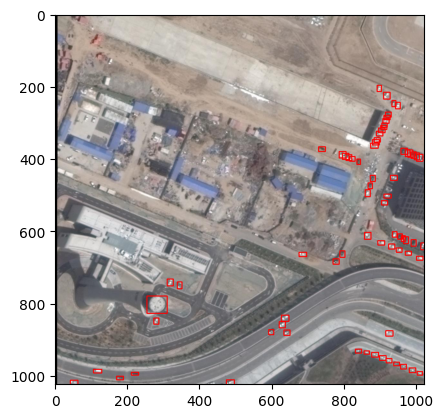

In [5]:
# 使用cv2库可视化bbox
# 绘制边界框
visualize_bbox(data_path(id),bboxes)
# 事实证明，bbox的格式是x1,y1,x2,y2

In [6]:
seg=get_seg(id)

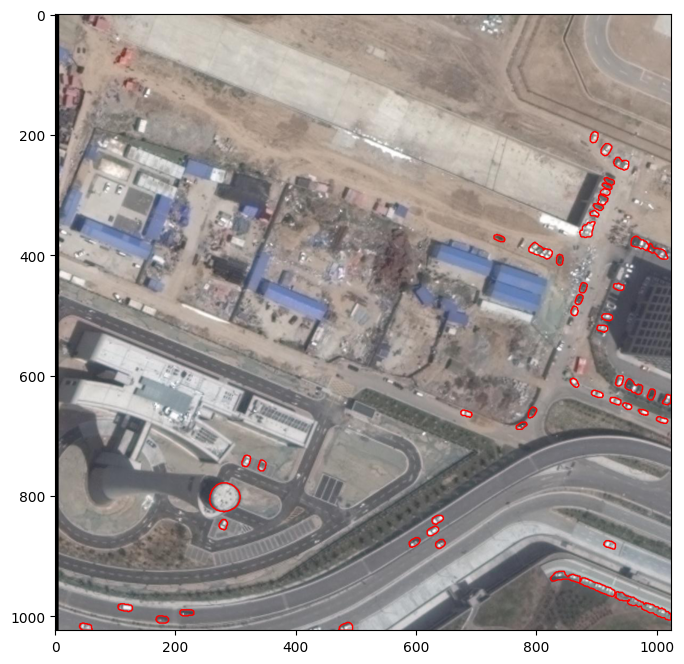

In [7]:
visualize_segmentation(data_path(id),seg)

In [8]:
# id="P0032_0002"
id="P0000_0001"
gt_lis=get_gt(id)
seg_lis=get_seg(id)
seg_box_lis=[seg2box(seg) for seg in seg_lis]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


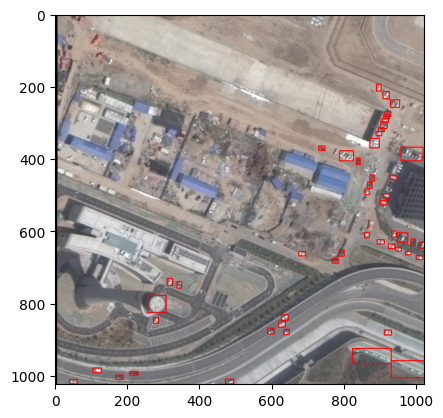

In [9]:
visualize_bbox(data_path(id),seg_box_lis)

In [11]:
gt_lis

[{'category': 'small-vehicle', 'bbox': [211.0, 991.0, 231.0, 999.0]},
 {'category': 'small-vehicle', 'bbox': [170.0, 1002.0, 189.0, 1012.0]},
 {'category': 'small-vehicle', 'bbox': [933.0, 602.0, 946.0, 617.0]},
 {'category': 'small-vehicle', 'bbox': [805.0, 389.0, 821.0, 405.0]},
 {'category': 'small-vehicle', 'bbox': [815.0, 394.0, 830.0, 407.0]},
 {'category': 'small-vehicle', 'bbox': [1012.0, 633.0, 1025.0, 652.0]},
 {'category': 'small-vehicle', 'bbox': [985.0, 624.0, 999.0, 642.0]},
 {'category': 'small-vehicle', 'bbox': [964.0, 616.0, 978.0, 635.0]},
 {'category': 'small-vehicle', 'bbox': [958.0, 613.0, 969.0, 629.0]},
 {'category': 'small-vehicle', 'bbox': [948.0, 608.0, 961.0, 623.0]},
 {'category': 'small-vehicle', 'bbox': [1000.0, 670.0, 1018.0, 681.0]},
 {'category': 'small-vehicle', 'bbox': [786.0, 380.0, 805.0, 398.0]},
 {'category': 'small-vehicle', 'bbox': [969.0, 656.0, 986.0, 667.0]},
 {'category': 'small-vehicle', 'bbox': [944.0, 647.0, 960.0, 659.0]},
 {'category': 

In [12]:
seg_label_lis=[]
for gt in gt_lis:
    info={}
    # 找一个对应的seg
    gt_box=gt["bbox"]
    gt_seg_iou=0
    seg_for_gt=None
    for seg,seg_box in zip(seg_lis,seg_box_lis):
        iou=calculate_iou(gt_box,seg_box)
        if gt_seg_iou<iou:
            gt_seg_iou=iou
            seg_for_gt=seg
    info["category"]=gt["category"]
    info["bbox"]=gt_box
    info["segmentation"]=seg_for_gt
    seg_label_lis.append(info)
